# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression

USANDO TENSORFLOW

In [1]:
#!pip3 install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

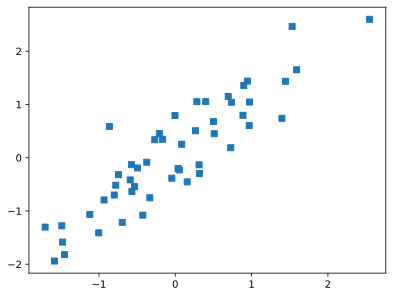

In [3]:
# Create data
N = 50
x = np.random.randn(N, 1).astype(np.float32)
y = x + np.random.randn(N, 1) / 2

# Plot data
plt.plot(x, y, 's')
plt.show()

In [4]:
# Build model
ANNreg = tf.keras.Sequential([
    tf.keras.layers.Dense(1),  # input layer
    tf.keras.layers.ReLU(),    # activation function
    tf.keras.layers.Dense(1)   # output layer
])

In [5]:
# Compile model
learningRate = 0.05
optimizer = tf.keras.optimizers.SGD(learningRate)
lossfun = tf.keras.losses.MeanSquaredError()

In [6]:
# Train the model
numepochs = 500
losses = []

for epochi in range(numepochs):
    with tf.GradientTape() as tape:
        yHat = ANNreg(x)
        loss = lossfun(y, yHat)
        losses.append(loss.numpy())

    gradients = tape.gradient(loss, ANNreg.trainable_variables)
    optimizer.apply_gradients(zip(gradients, ANNreg.trainable_variables))

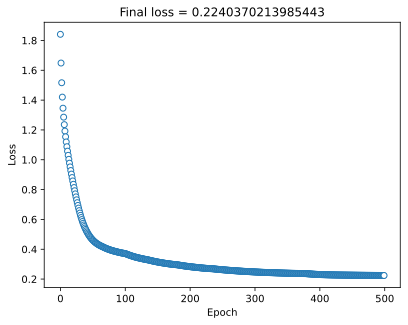

In [7]:
# Plot losses
plt.plot(losses, 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = {}'.format(losses[-1]))
plt.show()

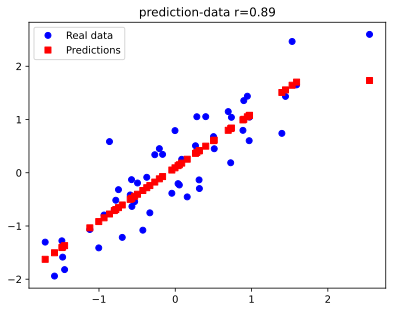

In [8]:
# Make predictions
predictions = ANNreg(x)

# Plot data and predictions
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, predictions.numpy(), 'rs', label='Predictions')
plt.title('prediction-data r={:.2f}'.format(np.corrcoef(y.T, predictions.numpy().T)[0, 1]))
plt.legend()
plt.show()